## 1. 背景及所要研究的问题 ：
   由数据来源Kaggle网站得知，泰坦尼克号沉没事件造成了2224名乘客和船员当中的1502人丧生。所提供的数据中包括了每个人年龄、性别、是否生存、船舱等级等详细的信息。这篇文章将会根据这些数据试图分析：在泰坦尼克事件中具有哪些特征的人群具有高的生存率？

## 2. 加载模块及数据

**加载分析所用模块及函数，加载绘图模块**

In [175]:
import matplotlib.pyplot as plti
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
from pandas import DataFrame, Series


**读取数据**

In [176]:
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

## 3. 初步浏览数据及数据整理

In [177]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


~~**初步浏览数据可以得出以下几点：**~~
~~1. 数据总量为891人，占总人数2224的40%。~~
~~2. 年龄数据缺失较少。~~
~~3. Cabin数据缺失较多没有太多参考价值，后面不做分析。~~
~~4. 姓名及船票数据格式较杂乱，没有太多可用信息，后面不做分析。~~
     


将性别数据由string: Female & Male转化为integer 0和1,便于后面分析男女比例 




In [178]:
sex_map = {'female': 0, 'male': 1}
titanic_df['Sex'] = titanic_df['Sex'].map(sex_map)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [179]:
titanic_df.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


上面结果显示绝大多数人的Embarked值为'S', 所以用S来补充缺失的Embarked值

In [180]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [181]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


## 4. 数据分析:

**4.1 先不考虑各变量之间的相互影响，进行各变量的总体分析**

In [182]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


以上图表可以看出：
1. 平均生存率为38.3%， 与Kaggle网站显示的全体2224人的生存率40%相当。
2. 船舱等级中位数为3，均值为2.3， 说明大多数为低等舱位。
3. 性别中位数为0.647，说明男性较多


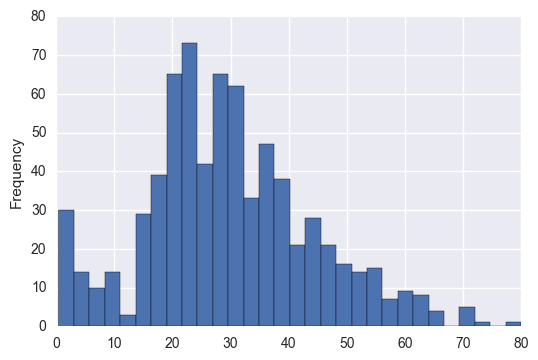

In [205]:
titanic_df['Age'].plot.hist(bins = 30)

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

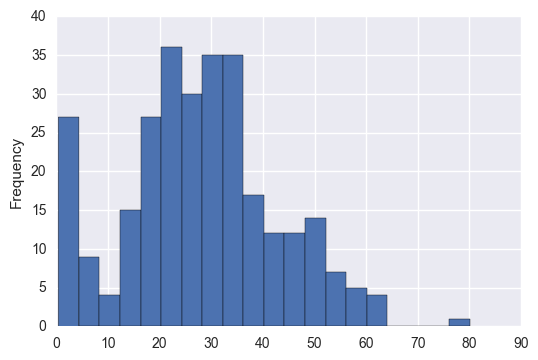

In [206]:
survived_group = titanic_df.groupby(["Survived"]).get_group(1)


survived_group['Age'].plot.hist(bins = 20)
survived_group['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%             NaN
50%             NaN
75%             NaN
max       74.000000
Name: Age, dtype: float64

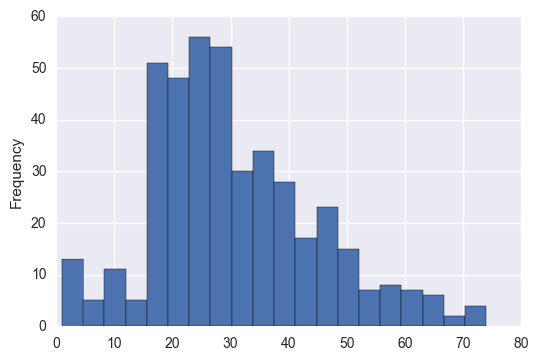

In [207]:
nonsurvived_group= titanic_df.groupby(["Survived"]).get_group(0)
nonsurvived_group['Age'].plot.hist(bins = 20)
nonsurvived_group['Age'].describe()

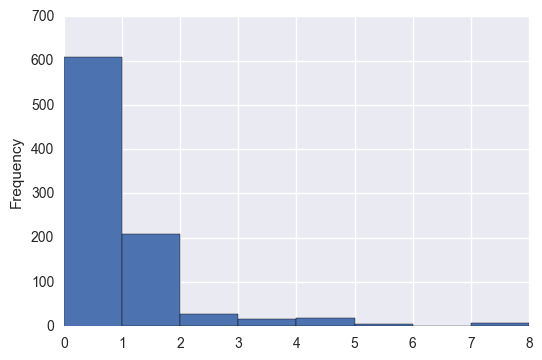

In [186]:
titanic_df['SibSp'].plot.hist(bins = 8)

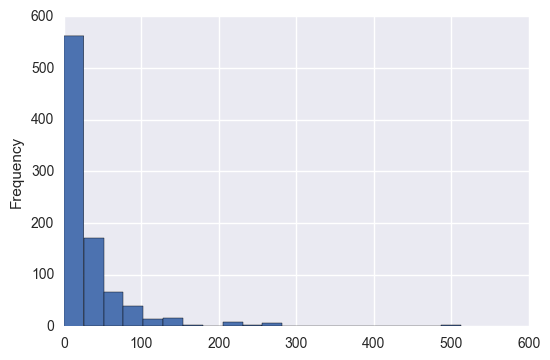

In [153]:
titanic_df['Fare'].plot.hist(bins = 20)

In [8]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


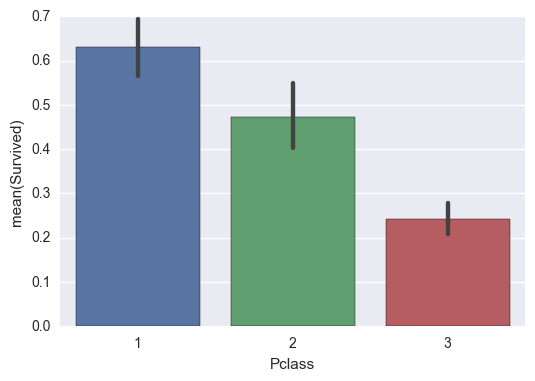

In [164]:
sns.barplot('Pclass', 'Survived', data=titanic_df)

In [9]:
titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
titanic_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
titanic_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
titanic_df[["Fare", "Survived"]].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Survived,Fare
1,1,48.395408
0,0,22.117887


In [30]:
#tinanic_df_addedage = titanic_df.fillna(titanic_df['Age'].mean())
titanic_df[["Age", "Survived"]].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Survived,Age
1,1,28.343690
0,0,30.626179


————————————————————————————————————————

此处要分别做一个histogram, 看看年龄的分布

考虑各个column做histogram。

## 6. 初步结论